In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

### Read netflix data and clean it

In [4]:
# read data
df = pd.read_csv("./input/netflix_userbase.csv")
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
0,1,Basic,10,15-01-22,10-06-23,United States,28,Male,Smartphone,1 Month
1,2,Premium,15,05-09-21,22-06-23,Canada,35,Female,Tablet,1 Month
2,3,Standard,12,28-02-23,27-06-23,United Kingdom,42,Male,Smart TV,1 Month
3,4,Standard,12,10-07-22,26-06-23,Australia,51,Female,Laptop,1 Month
4,5,Basic,10,01-05-23,28-06-23,Germany,33,Male,Smartphone,1 Month
...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,25-07-22,12-07-23,Spain,28,Female,Smart TV,1 Month
2496,2497,Basic,15,04-08-22,14-07-23,Spain,33,Female,Smart TV,1 Month
2497,2498,Standard,12,09-08-22,15-07-23,United States,38,Male,Laptop,1 Month
2498,2499,Standard,13,12-08-22,12-07-23,Canada,48,Female,Tablet,1 Month


In [5]:
df.shape

(2500, 10)

In [6]:
df.dtypes

User ID               int64
Subscription Type    object
Monthly Revenue       int64
Join Date            object
Last Payment Date    object
Country              object
Age                   int64
Gender               object
Device               object
Plan Duration        object
dtype: object

In [7]:
# change 'Join Date'  and 'Last Payment Date' datatype    
df["Join Date"] = pd.to_datetime(df["Join Date"] , format="%d-%m-%y")
df["Last Payment Date"] = pd.to_datetime(df["Last Payment Date"] , format="%d-%m-%y")
df.dtypes

User ID                       int64
Subscription Type            object
Monthly Revenue               int64
Join Date            datetime64[ns]
Last Payment Date    datetime64[ns]
Country                      object
Age                           int64
Gender                       object
Device                       object
Plan Duration                object
dtype: object

In [8]:
df["JoinMonthYear"] = df["Join Date"].dt.strftime("%Y-%m")
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,JoinMonthYear
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,2022-01
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,2021-09
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023-02
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,2022-07
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,2023-05
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month,2022-07
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month,2022-08
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month,2022-08
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month,2022-08


In [9]:
df

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,JoinMonthYear
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,2022-01
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,2021-09
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023-02
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,2022-07
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,2023-05
...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Premium,14,2022-07-25,2023-07-12,Spain,28,Female,Smart TV,1 Month,2022-07
2496,2497,Basic,15,2022-08-04,2023-07-14,Spain,33,Female,Smart TV,1 Month,2022-08
2497,2498,Standard,12,2022-08-09,2023-07-15,United States,38,Male,Laptop,1 Month,2022-08
2498,2499,Standard,13,2022-08-12,2023-07-12,Canada,48,Female,Tablet,1 Month,2022-08


In [10]:
# load cleaned data to ./netflixUser.csv 
df.to_csv("./netflixUser.csv" , index=False)

### What is the Subscription Type breakdown of the data ? 

In [11]:
bySubTypeDF = df.groupby("Subscription Type").agg(
    count = ("User ID" , "count"),
    totalRev = ("Monthly Revenue" , "sum"),
    avgRev = ("Monthly Revenue" , "mean")
    ).reset_index()
bySubTypeDF["PCT"] = np.round(bySubTypeDF["count"]/len(df) , 4)*100
bySubTypeDF["avgRev"] = np.round(bySubTypeDF["avgRev"] , 2)
bySubTypeDF

,Subscription Type,count,totalRev,avgRev,PCT
0,Basic,999,12469,12.48,39.96
1,Premium,733,9229,12.59,29.32
2,Standard,768,9573,12.46,30.72


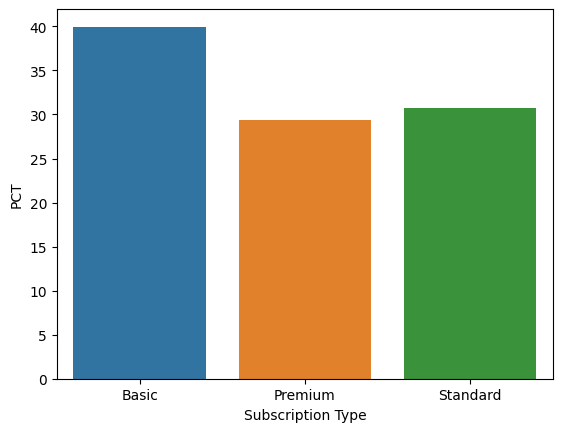

In [12]:
sns.barplot(bySubTypeDF , x="Subscription Type" , y="PCT" , hue="Subscription Type")
plt.show()

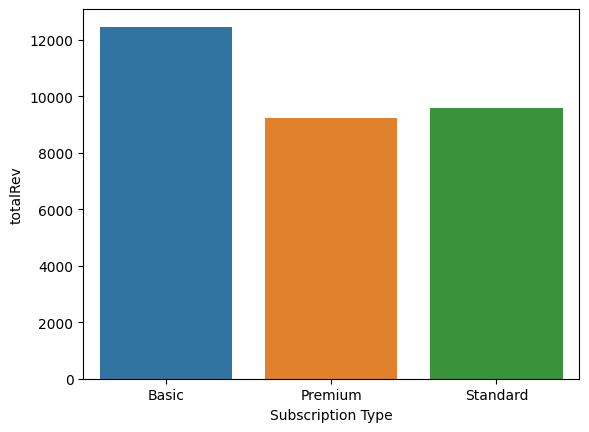

In [13]:
sns.barplot(bySubTypeDF , x = "Subscription Type" , y="totalRev" , hue="Subscription Type")
plt.show()

### What is total revenue and revenue per month?

In [14]:
# What is total revenue
totalRev = df["Monthly Revenue"].sum()
totalRev

31271

In [15]:
df.head(3)

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,JoinMonthYear
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,2022-01
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,2021-09
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023-02


In [16]:
byMonthYearDF =     df\
                        .groupby("JoinMonthYear")\
                        .agg(
                                totalRev = ("Monthly Revenue" , "sum"),
                                newMembers = ("User ID" , "count")
                                )\
                        .reset_index()
byMonthYearDF

,JoinMonthYear,totalRev,newMembers
0,2021-09,39,3
1,2021-10,39,3
2,2021-11,46,4
3,2021-12,52,4
4,2022-01,98,8
5,2022-02,62,5
6,2022-03,161,13
7,2022-04,241,19
8,2022-05,505,40
9,2022-06,3698,295


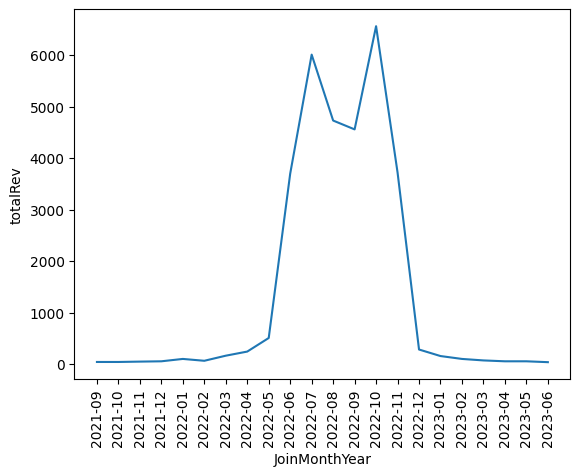

In [17]:
# Revenue by month 

sns.lineplot(byMonthYearDF , x = "JoinMonthYear" , y="totalRev")
plt.xticks(rotation = 90)
plt.show()

### New members by month

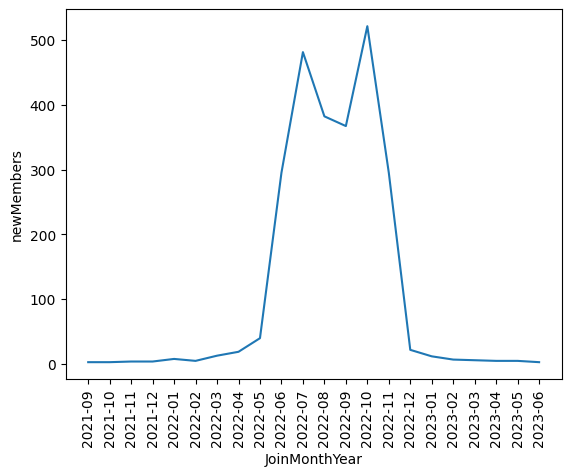

In [18]:
# New members by month
sns.lineplot(byMonthYearDF , y="newMembers" , x = "JoinMonthYear")
plt.xticks(rotation = 90)
plt.show()

### What is avg revenue per user ?

In [19]:
# avg revenue per user
totalUserCount = len(df["User ID"].unique())
totalUserCount

2500

In [20]:
np.round(totalRev/totalUserCount , 2)

12.51

### What is country breakdown of the clients ? What is the revenue per country?

In [21]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,JoinMonthYear
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,2022-01
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,2021-09
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023-02
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,2022-07
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,2023-05


In [22]:
# Country breakdown of customers
byCountryDF = df\
                .groupby("Country")\
                .agg(
                    countCustomers = ("User ID" , "count"),
                    totalRev = ("Monthly Revenue" , "sum")
                    )\
                    .reset_index()


In [23]:
byCountryDF

,Country,countCustomers,totalRev
0,Australia,183,2271
1,Brazil,183,2285
2,Canada,317,3950
3,France,183,2307
4,Germany,183,2260
5,Italy,183,2317
6,Mexico,183,2237
7,Spain,451,5662
8,United Kingdom,183,2318
9,United States,451,5664


In [24]:
byCountryDF["CountPCT"] = np.round(byCountryDF["countCustomers"]/totalUserCount , 4)*100
byCountryDF["RevPCT"] = np.round(byCountryDF["totalRev"]/totalRev , 4)*100
byCountryDF

,Country,countCustomers,totalRev,CountPCT,RevPCT
0,Australia,183,2271,7.32,7.26
1,Brazil,183,2285,7.32,7.31
2,Canada,317,3950,12.68,12.63
3,France,183,2307,7.32,7.38
4,Germany,183,2260,7.32,7.23
5,Italy,183,2317,7.32,7.41
6,Mexico,183,2237,7.32,7.15
7,Spain,451,5662,18.04,18.11
8,United Kingdom,183,2318,7.32,7.41
9,United States,451,5664,18.04,18.11


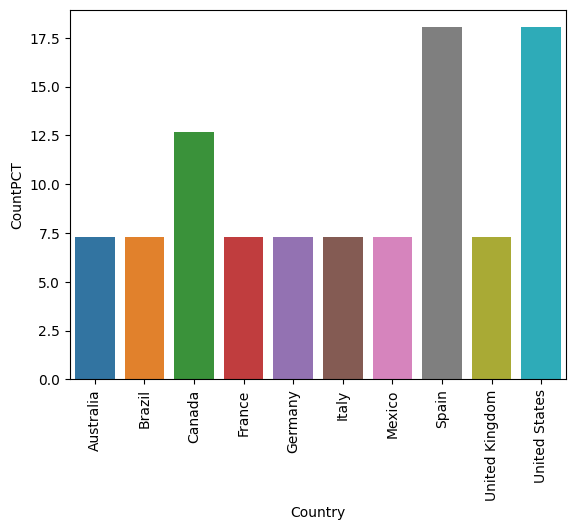

In [25]:
sns.barplot(byCountryDF , x = "Country" , y="CountPCT" , hue = "Country")
plt.xticks(rotation = 90)
plt.show()

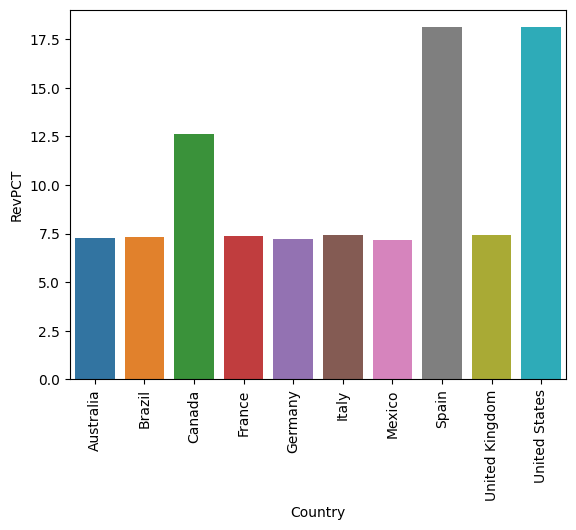

In [26]:
sns.barplot(byCountryDF , x = "Country" , y="RevPCT" , hue = "Country")
plt.xticks(rotation = 90)
plt.show()

### What is the age distribution of clients?

In [27]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,JoinMonthYear
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,2022-01
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,2021-09
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023-02
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,2022-07
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,2023-05


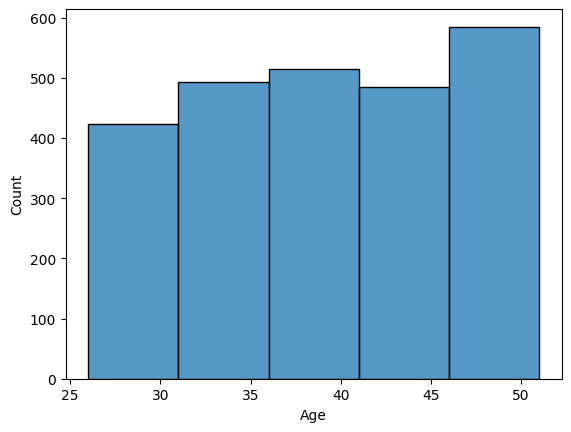

In [28]:
# Age distribution of customers
sns.histplot(df , x = "Age" , bins=5)
plt.show()

### What is the gender breakdown of clients? What is the total revenue per gender?

In [29]:
# Gender breakdown of our customers
byGenderDF = df.groupby("Gender")\
                .agg(count = ("User ID" , "count") , totalRev = ("Monthly Revenue" , "sum"))\
                .reset_index()
byGenderDF

,Gender,count,totalRev
0,Female,1257,15736
1,Male,1243,15535


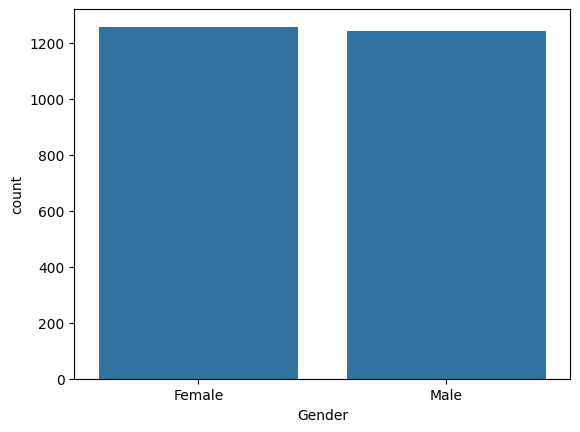

In [30]:
sns.barplot(byGenderDF  , x = "Gender" , y = "count")
plt.show()

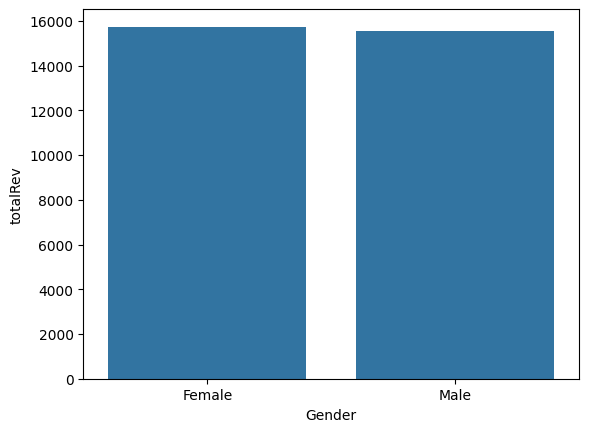

In [31]:
sns.barplot(byGenderDF  , x = "Gender" , y = "totalRev")
plt.show()

### What is the device breakdown of the clients ? 

In [32]:
df.head()

,User ID,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration,JoinMonthYear
0,1,Basic,10,2022-01-15,2023-06-10,United States,28,Male,Smartphone,1 Month,2022-01
1,2,Premium,15,2021-09-05,2023-06-22,Canada,35,Female,Tablet,1 Month,2021-09
2,3,Standard,12,2023-02-28,2023-06-27,United Kingdom,42,Male,Smart TV,1 Month,2023-02
3,4,Standard,12,2022-07-10,2023-06-26,Australia,51,Female,Laptop,1 Month,2022-07
4,5,Basic,10,2023-05-01,2023-06-28,Germany,33,Male,Smartphone,1 Month,2023-05


In [33]:
df["Device"].unique()

array(['Smartphone', 'Tablet', 'Smart TV', 'Laptop'], dtype=object)

In [34]:
# Device breakdown of data
byDeviceDF = df\
                .groupby("Device")\
                .agg(count = ("User ID" , "count") , totalRev = ("Monthly Revenue" , "sum"))\
                .reset_index()
byDeviceDF

,Device,count,totalRev
0,Laptop,636,7994
1,Smart TV,610,7615
2,Smartphone,621,7691
3,Tablet,633,7971


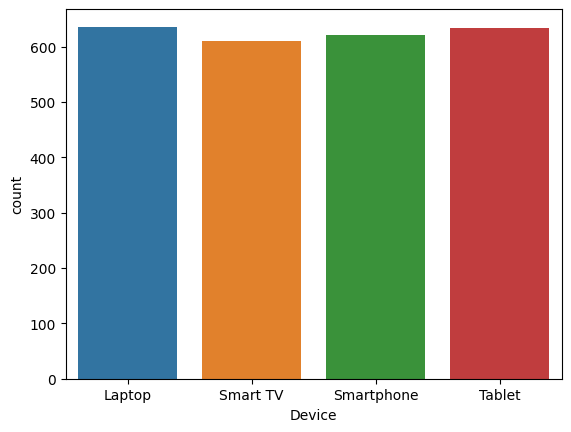

In [35]:
sns.barplot(byDeviceDF , x = "Device" , y = "count" , hue="Device")
plt.show()

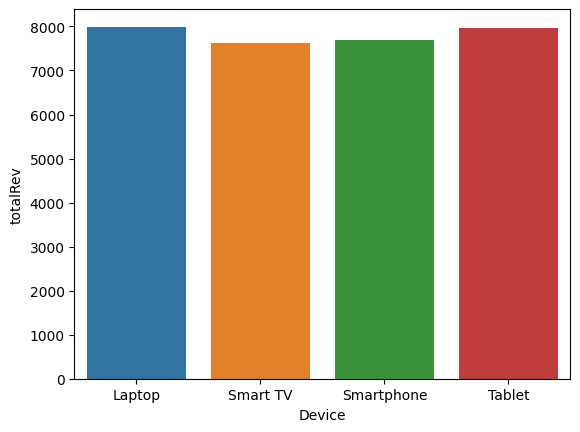

In [36]:
sns.barplot(byDeviceDF , x = "Device" , y = "totalRev" , hue="Device")
plt.show()